In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sys import path
%matplotlib inline

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
%cd /content/drive/MyDrive/PHI/ToF_ML/src

/content/drive/MyDrive/PHI/ToF_ML/src


In [3]:
from setup import data_setup
dg = data_setup()

In [4]:
from data_transformation import get_fragment_stats
df = dg.calibrated_df(slope_index=2)
df = get_fragment_stats(df, prop_name='original_proportions_identified')
df.head()

,file_name,Mass/Time,MassOffset,StartFlightTime,SpecBinSize,channels,intensities,masses,avg_dist_frags_low,avg_dist_frags_high,adjusted_original_proportions_identified,original_proportions_identified,diff,prop_diff_in_low,calibration
0,0106301.cas,0.387425,-0.275047,0.0,1.248,"[2644.0367300000003, 3505.0183700000002, 4162....","[73874, 1234, 138, 610, 1216, 4159, 8958, 1084...","[1.0067357827001502, 2.0154136848060986, 3.019...",0.001210,0.002547,0.398438,0.398438,0.001337,1.105054,0
1,0107316.cas,0.387337,-0.278302,0.0,1.248,"[2647.00072, 3508.9949100000003, 4164.59326000...","[49864, 1034, 168, 4696, 8247, 13992, 17903, 2...","[1.0025002148906825, 2.0105384152423085, 3.009...",0.001230,0.002755,0.129771,0.129771,0.001525,1.239977,0
2,0110203.cas,0.378938,-0.271015,0.0,4.992,"[1973.87665, 2049.0706800000003, 2122.01224, 2...","[23352, 74717, 10387, 947, 12344, 9121, 249, 4...","[11.9915465622805, 12.996908473240481, 14.0108...",0.001164,0.002964,0.388889,0.388889,0.001800,1.545688,0
3,0110212.cas,0.379297,-0.269824,0.0,4.992,"[672.00298, 891.90543, 1970.94521, 2046.11295,...","[34398, 304, 2223, 3521, 5205, 6509, 99, 115, ...","[1.0051638174978792, 2.0134261084051888, 11.98...",0.001326,0.002605,0.379630,0.379630,0.001279,0.964176,0
4,0116511.cas,0.383481,-0.302161,0.0,1.248,"[2726.98153, 3594.53649, 4265.28736, 7866.5038...","[42995, 602, 151, 17912, 9536, 17609, 29604, 5...","[1.0058658675679875, 2.011083088854326, 3.0245...",0.001521,0.003114,0.350427,0.336066,0.001593,1.047139,0


In [ ]:
from data_transformation import get_frags
spots = get_frags()['FragmentMass']

In [ ]:
def C(channels, spec_bin_size, start_time,  mass_over_time, mass_offset):
    return ((np.array(channels) * .001 * spec_bin_size + start_time) * mass_over_time + mass_offset)**2

In [ ]:
from data_transformation import recalibrate

In [6]:
mods = pd.read_csv('../data/fixing 1441 calibration/calibration_updates.csv')
mods.head()

,offsets,slopes,names,indices
0,-0.000157,-0.000105,0106301.cas,0
1,-0.000002,-0.000579,0107316.cas,1
2,0.000151,0.000263,0110203.cas,2
3,-0.000298,-0.000316,0110212.cas,3
4,0.000074,-0.000316,0116511.cas,4


In [7]:
new_mods = pd.DataFrame(columns=mods.columns)
i = 0
for row in mods.itertuples():
    new_index = df[df['file_name']==row.names].index[0]
    data = {'offsets':row.offsets, 'slopes':row.slopes, 'names':row.names, 'indices':new_index}
    if not (new_mods['names'] == row.names).any():
        new_mods.loc[i] = data
        i += 1

In [8]:
new_mods.to_csv('../data/fixing 1441 calibration/duplicate_indices_removed_calib_modifiers.csv')

In [9]:
new_df = pd.DataFrame(columns=df.columns)
i = 0
for row in new_mods.itertuples():
    info = df.loc[row.indices].copy()
    info[1] = info[1] + info[1] * float(row.slopes)
    info[2] = info[2] + info[2] * float(row.offsets)
    new_df.loc[i] = info
    i += 1

In [10]:
from data_generator import DataGenerator
a = DataGenerator(new_df)

In [11]:
b = a.calibrated_df(slope_index=2)

In [12]:
b = get_fragment_stats(b)

In [19]:
b.head()

,file_name,Mass/Time,MassOffset,StartFlightTime,SpecBinSize,channels,intensities,masses,avg_dist_frags_low,avg_dist_frags_high,adjusted_original_proportions_identified,original_proportions_identified,diff,prop_diff_in_low,calibration,adjusted_proportion_identified,proportion_identified
0,0106301.cas,0.387384,-0.275004,0.0,1.248,"[2644.0367300000003, 3505.0183700000002, 4162....","[73874, 1234, 138, 610, 1216, 4159, 8958, 1084...","[1.0065519723918102, 2.015029094672708, 3.0191...",0.001298,0.002255,0.398438,0.398438,0.000958,0.738174,0,0.515625,0.515625
1,0107316.cas,0.387113,-0.278302,0.0,1.248,"[2647.00072, 3508.9949100000003, 4164.59326000...","[49864, 1034, 168, 4696, 8247, 13992, 17903, 2...","[1.00101811517532, 2.0077555328930656, 3.00565...",0.001537,0.002586,0.129771,0.129771,0.001049,0.682225,0,0.511450,0.511450
2,0110203.cas,0.379037,-0.271056,0.0,4.992,"[1973.87665, 2049.0706800000003, 2122.01224, 2...","[23352, 74717, 10387, 947, 12344, 9121, 249, 4...","[11.998071176139083, 13.003971096434277, 14.01...",0.001640,0.001858,0.388889,0.388889,0.000218,0.133100,0,0.444444,0.444444
3,0110212.cas,0.379177,-0.269744,0.0,4.992,"[672.00298, 891.90543, 1970.94521, 2046.11295,...","[34398, 304, 2223, 3521, 5205, 6509, 99, 115, ...","[1.0045194511091773, 2.012140966655108, 11.978...",0.001337,0.002206,0.379630,0.379630,0.000868,0.649178,0,0.592593,0.592593
4,0116511.cas,0.383360,-0.302184,0.0,1.248,"[2726.98153, 3594.53649, 4265.28736, 7866.5038...","[42995, 602, 151, 17912, 9536, 17609, 29604, 5...","[1.0049940659400325, 2.0094784706009245, 3.022...",0.001397,0.002171,0.350427,0.336066,0.000774,0.554114,0,0.487179,0.467213


In [27]:
b['masses'] = b['masses'].apply(list)

In [29]:
b.to_csv('../data/fixed_1400_no_array.csv', index=False)

In [ ]:
recalibrate(df.loc[38], spots, 0, 0, start_ind=1)

(0.3821138211382114, 0.0010385018267003974, 0.0024521261808540854)

In [ ]:
recalibrate(df.loc[38], spots, float(p.slopes),float(p.offsets), start_ind=1)

(0.6178861788617886, 0.0013011074551222822, 0.0021107662067207044)

In [20]:
b[b['adjusted_original_proportions_identified'] > b['adjusted_proportion_identified']]

,file_name,Mass/Time,MassOffset,StartFlightTime,SpecBinSize,channels,intensities,masses,avg_dist_frags_low,avg_dist_frags_high,adjusted_original_proportions_identified,original_proportions_identified,diff,prop_diff_in_low,calibration,adjusted_proportion_identified,proportion_identified


In [21]:
b[b['adjusted_original_proportions_identified'] > b['adjusted_proportion_identified']]

,file_name,Mass/Time,MassOffset,StartFlightTime,SpecBinSize,channels,intensities,masses,avg_dist_frags_low,avg_dist_frags_high,adjusted_original_proportions_identified,original_proportions_identified,diff,prop_diff_in_low,calibration,adjusted_proportion_identified,proportion_identified


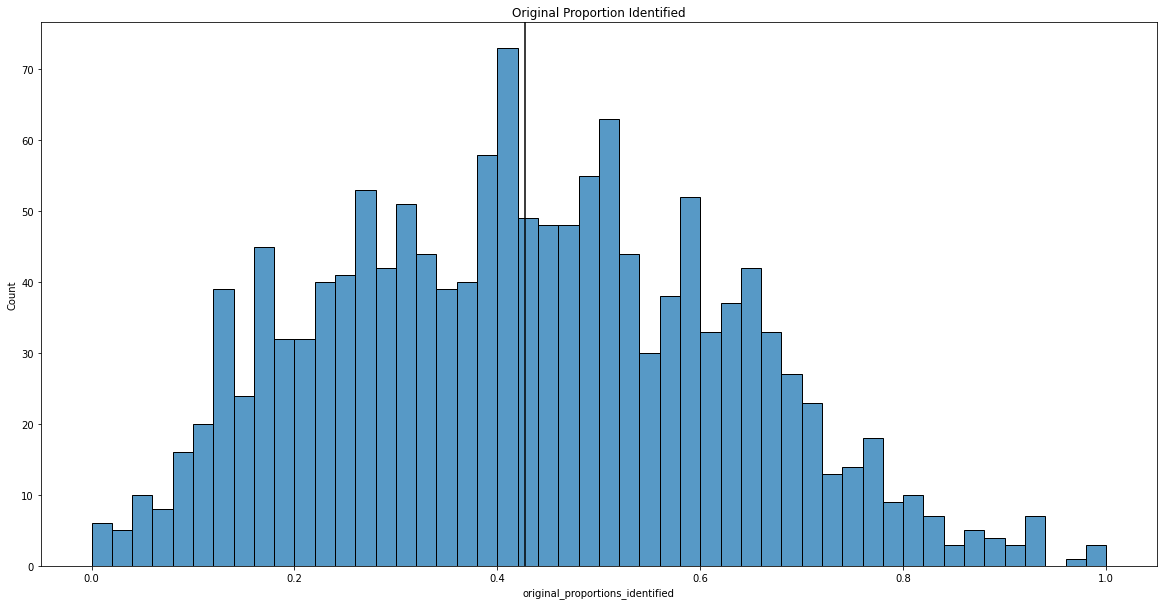

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(x=b['original_proportions_identified'], bins=50)
plt.axvline(np.mean(b['original_proportions_identified']), 0,70, color='black')
#plt.axvline(np.mean(b[b['calibration']==0]['proportions_peaks_identified']), 0,70, color='red')
#plt.axvline(np.mean(b[b['calibration']==1]['proportions_peaks_identified']), 0,70, color='blue')
plt.title('Original Proportion Identified')
plt.show()

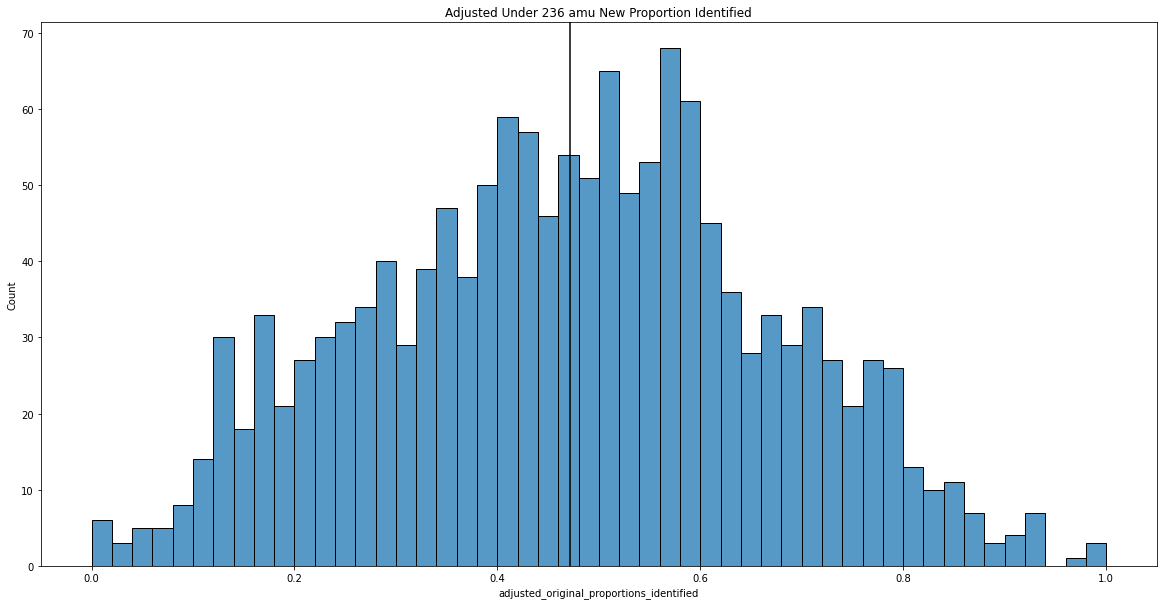

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(x=b['adjusted_original_proportions_identified'], bins=50)
plt.axvline(np.mean(b['adjusted_original_proportions_identified']), 0,70, color='black')
#plt.axvline(np.mean(b[b['calibration']==0]['adjusted_proportion_identified']), 0,70, color='red')
#plt.axvline(np.mean(b[b['calibration']==1]['adjusted_proportion_identified']), 0,70, color='blue')
plt.title('Adjusted Under 236 amu New Proportion Identified')
plt.show()

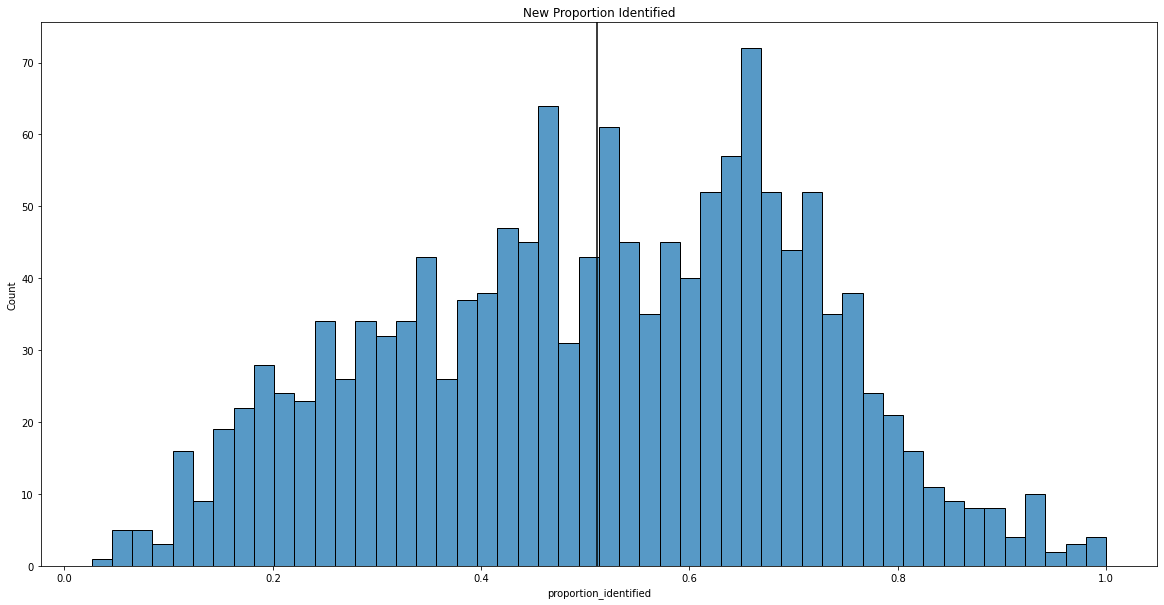

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(x=b['proportion_identified'], bins=50)
plt.axvline(np.mean(b['proportion_identified']), 0,70, color='black')
#plt.axvline(np.mean(b[b['calibration']==0]['proportion_identified']), 0,70, color='red')
#plt.axvline(np.mean(b[b['calibration']==1]['proportion_identified']), 0,70, color='blue')
plt.title('New Proportion Identified')
plt.show()

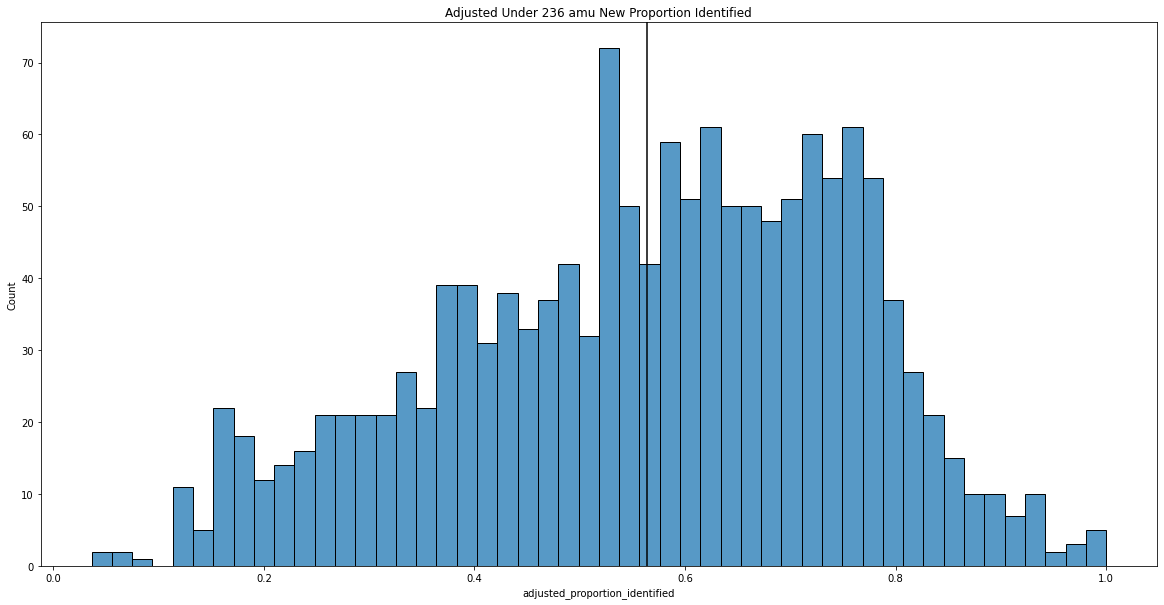

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(x=b['adjusted_proportion_identified'], bins=50)
plt.axvline(np.mean(b['adjusted_proportion_identified']), 0,70, color='black')
#plt.axvline(np.mean(b[b['calibration']==0]['adjusted_proportion_identified']), 0,70, color='red')
#plt.axvline(np.mean(b[b['calibration']==1]['adjusted_proportion_identified']), 0,70, color='blue')
plt.title('Adjusted Under 236 amu New Proportion Identified')
plt.show()

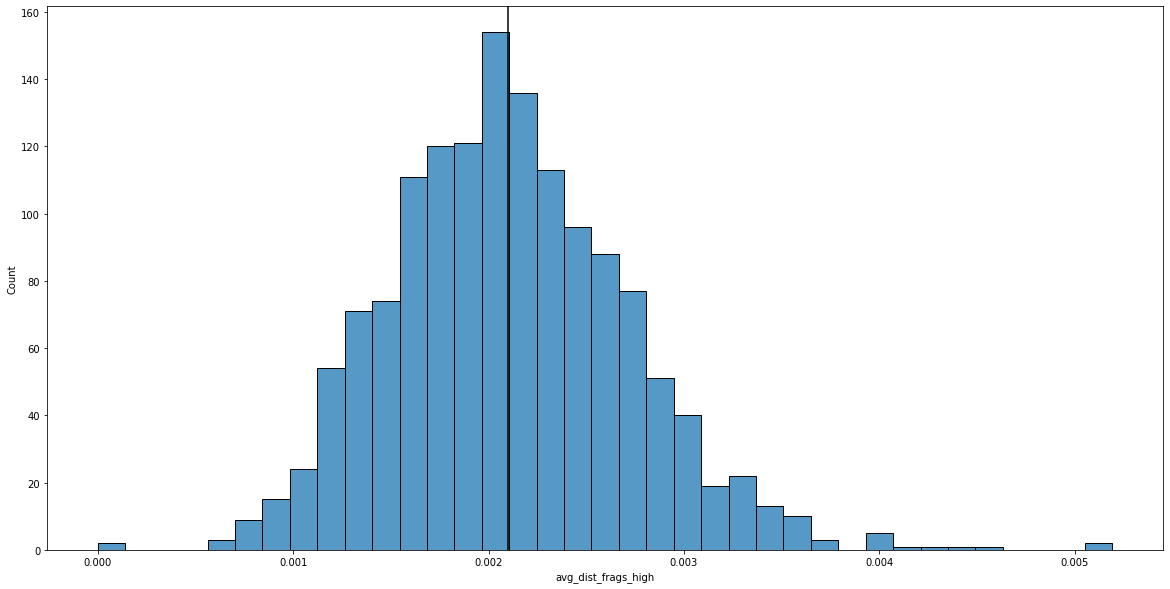

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(df['avg_dist_frags_high'])
plt.axvline(np.mean(df['avg_dist_frags_high']), 0,70, color='black')

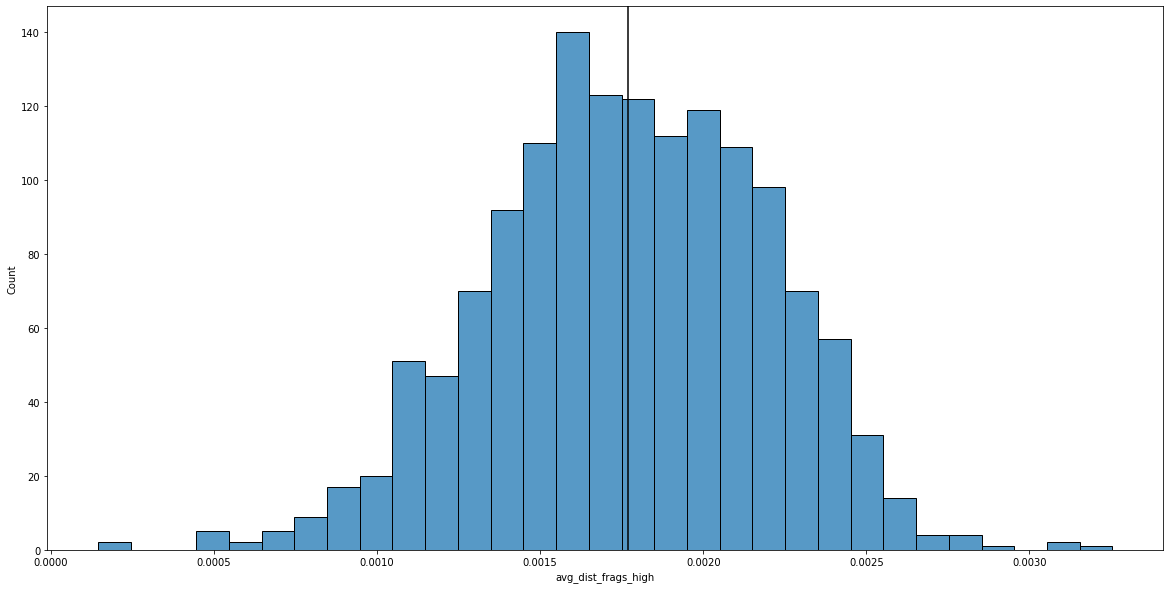

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(b['avg_dist_frags_high'])
plt.axvline(np.mean(b['avg_dist_frags_high']), 0,70, color='black')

In [ ]:
df.columns

Index(['file_name', 'Mass/Time', 'MassOffset', 'StartFlightTime',
       'SpecBinSize', 'channels', 'intensities', 'masses',
       'avg_dist_frags_low', 'avg_dist_frags_high',
       'adjusted_original_proportions_identified',
       'original_proportions_identified', 'diff', 'prop_diff_in_low',
       'calibration'],
      dtype='object')

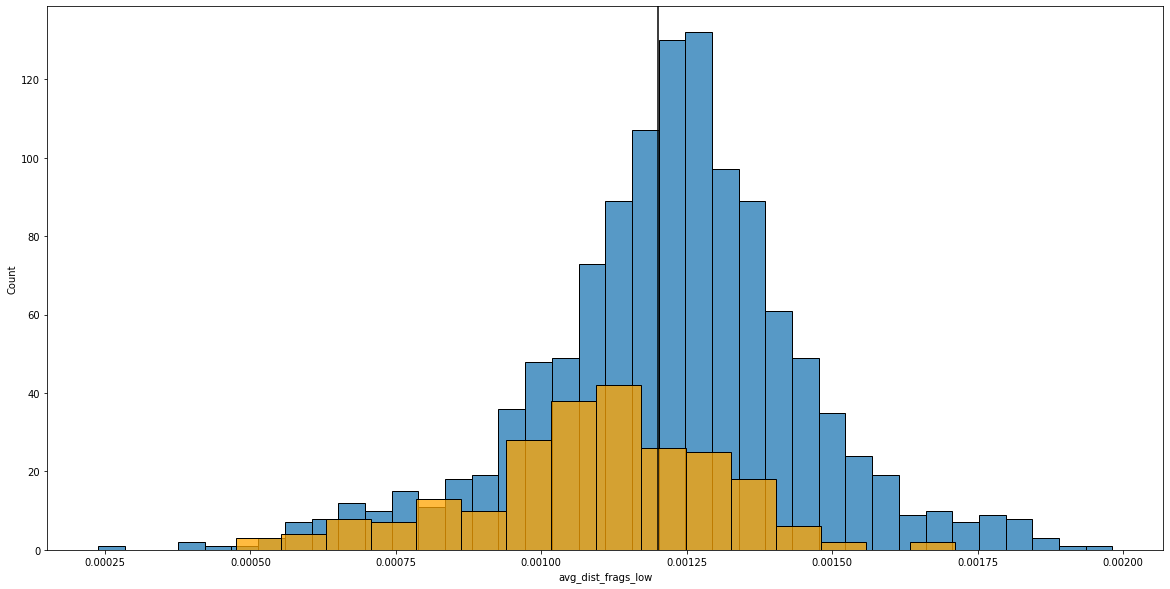

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(df[(df['calibration']==0) & (df['avg_dist_frags_low'] < .002)& (df['avg_dist_frags_low'] > .0002)]['avg_dist_frags_low'])
sns.histplot(df[df['calibration']==1]['avg_dist_frags_low'], color='orange')
plt.axvline(np.mean(df['avg_dist_frags_low']), 0,70, color='black')

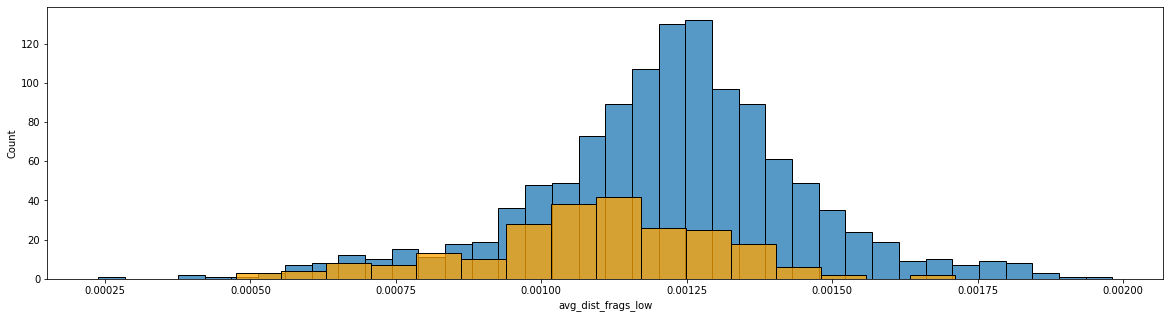

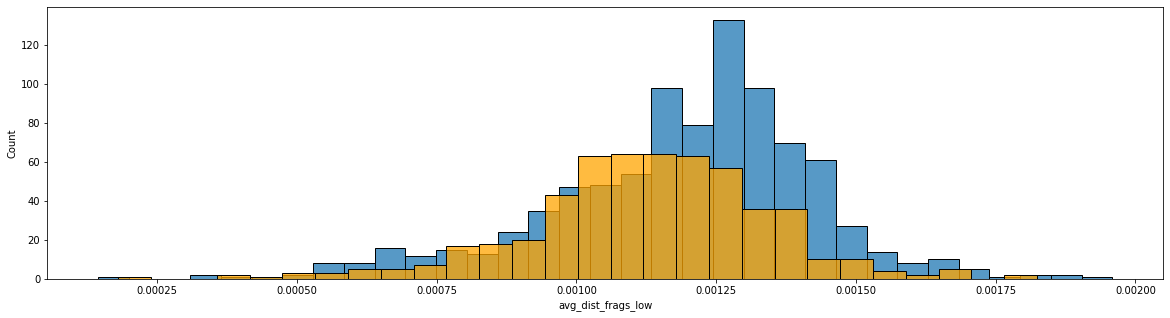

In [ ]:
plt.figure(figsize=(20, 5))
sns.histplot(df[(df['calibration']==0) & (df['avg_dist_frags_low'] < .002)& (df['avg_dist_frags_low'] > .0002)]['avg_dist_frags_low'])
sns.histplot(df[df['calibration']==1]['avg_dist_frags_low'], color='orange')
plt.figure(figsize=(20, 5))
sns.histplot(b[b['calibration']==0]['avg_dist_frags_low'])
sns.histplot(b[b['calibration']==1]['avg_dist_frags_low'], color='orange')

In [ ]:
np.sum(df['calibration'])

232

In [ ]:
np.sum(b['calibration'])

541

In [ ]:
def peaks_below_235(masses):
    below = 0
    for peak in masses:
        if peak < 235:
            below += 1
    return below

In [ ]:
len(b[(b['adjusted_proportion_identified'] < .4)]['masses'])

374

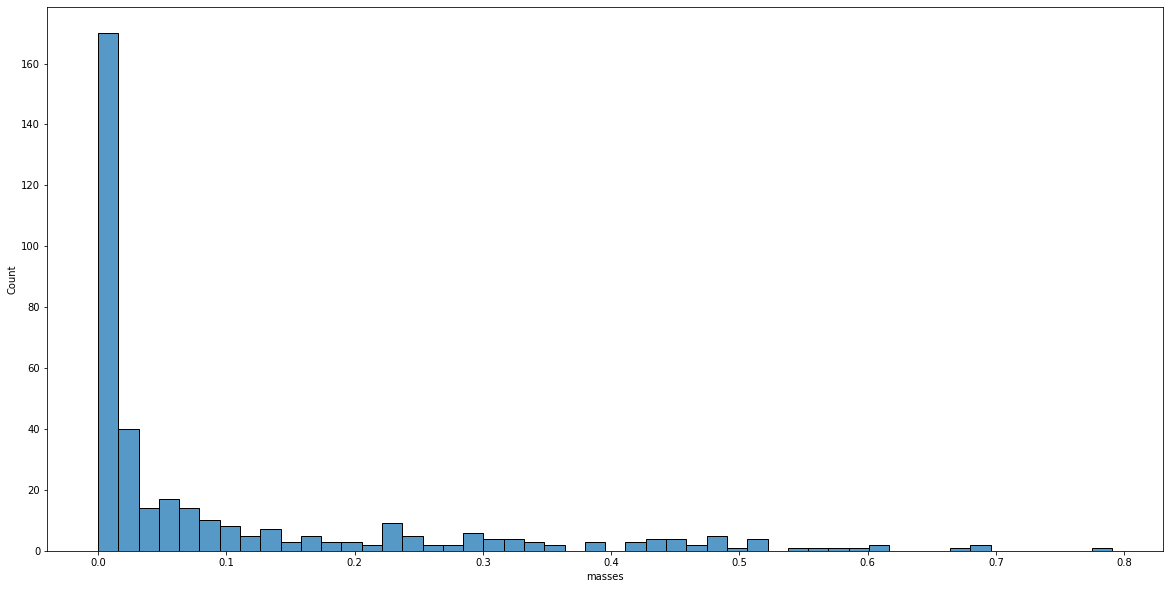

In [ ]:
plt.figure(figsize=(20, 10))
o = b[(b['adjusted_proportion_identified'] < .4)]['masses'].apply(peaks_below_235)
l = b[(b['adjusted_proportion_identified'] < .4)]['masses'].apply(len)
sns.histplot(1 - o /l, bins=50)

In [ ]:
len(b[(b['adjusted_proportion_identified'] < .4) & (b['masses'].apply(len) >800)]['masses'])

72

In [ ]:
def convert_slope(row):
    val = 1 / (row.SpecBinSize * .001 * row[2])
    return val
def convert_intercept(slope, row):
    return (-1 * slope * row.MassOffset - (row.StartFlightTime / (row.SpecBinSize * 0.001)) )

In [ ]:
c = df[df['file_name'] == '061NEG1.cas']

In [ ]:
for row in c.itertuples():
    slope = convert_slope(row)
    print(slope)
    print((convert_intercept(slope, row)))

19043.165018713586
0.2260082317613361


In [ ]:
c = b[b['file_name'] == '061NEG1.cas']

In [ ]:
len(b.loc[741]['masses'])

324

In [ ]:
df.loc[741]

file_name                                                                        LOC326P1.cas
Mass/Time                                                                            0.388675
MassOffset                                                                           -1.08543
StartFlightTime                                                                       2.79271
SpecBinSize                                                                             0.624
channels                                    [4137.90107, 5852.80622, 7168.4592, 14282.1438...
intensities                                 [70175, 2412, 364, 15326, 23806, 30353, 28124,...
masses                                      [1.0072246975579726, 2.0150584106128426, 3.022...
avg_dist_frags_low                                                                 0.00117265
avg_dist_frags_high                                                                0.00191727
adjusted_original_proportions_identified                    

In [ ]:
b[ (b['adjusted_proportion_identified'] < .05)].head()

,file_name,Mass/Time,MassOffset,StartFlightTime,SpecBinSize,channels,intensities,masses,avg_dist_frags_low,avg_dist_frags_high,adjusted_original_proportions_identified,original_proportions_identified,diff,prop_diff_in_low,calibration,adjusted_proportion_identified,proportion_identified
741,Zhu SL40-011~pb2.cas,0.385084,-0.722395,0.0,0.128,"[28179.48585, 28219.96016, 28323.19735, 30202....","[16260.0, 25919.0, 3544.0, 113621.0, 10337.0, ...","[0.4443466713546216, 0.4470103711486902, 0.453...",0.001414,0.002401,0.021605,0.021605,0.000986,0.697479,0,0.046296,0.046296
1203,Sample-3 Bunched Pos-081.cas,0.383323,-0.433160,0.0,0.128,"[37863.52131, 79674.50088, 82589.46491, 85393....","[153.0, 1053.0, 912.0, 1530.0, 5123.0, 489.0, ...","[2.02955626532377, 12.083224542458797, 13.0980...",0.000144,0.000144,0.000000,0.000000,0.000000,0.000000,0,0.036364,0.025974


In [ ]:
def convert_slope(row):
    val = 1 / (row.SpecBinSize * .001 * row[2])
    return val
def convert_intercept(slope, row):
    return (-1 * slope * row.MassOffset - (row.StartFlightTime / (row.SpecBinSize * 0.001)) )

In [ ]:
df[df['file_name'] == '050895~3.cas']

,file_name,Mass/Time,MassOffset,StartFlightTime,SpecBinSize,channels,intensities,masses,avg_dist_frags_low,avg_dist_frags_high,adjusted_original_proportions_identified,original_proportions_identified,diff,prop_diff_in_low,calibration
52,050895~3.cas,0.17053,-0.513186,16.083,10.0,"[723.81712, 807.0848599999999, 887.42059000000...","[1200, 1759, 3628, 7973, 128, 1156, 165, 20114...","[11.997659135326671, 13.001504218934517, 14.00...",0.001343,0.002546,0.318386,0.206395,0.001203,0.895376,0


In [ ]:
for row in df[df['file_name'] == '050895~3.cas'].itertuples():
    slope = convert_slope(row)
    print(slope)
    print(convert_intercept(slope, row))

586.4084627326192
-1307.3632406283905


In [ ]:
for row in b[b['file_name'] == '050895~3.cas'].itertuples():
    slope = convert_slope(row)
    print(slope)
    print(convert_intercept(slope, row))

586.315837173837
-1307.3668295343664


In [ ]:
masses, frags, distances = get_frags_dists(b.loc[51]['masses'], spots, ab=True)

In [ ]:
pd.DataFrame({'Mass': masses, 'Fragment': frags, 'Deviation': distances})

,Mass,Fragment,Deviation
0,12.001493,12.00000,0.001493
1,13.005657,13.00782,0.002163
2,14.012695,14.01564,0.002945
3,15.020851,15.02346,0.002609
4,22.991822,22.98977,0.002052
...,...,...,...
105,198.006534,198.00648,0.000054
106,199.024265,199.02554,0.001275
107,200.044544,200.04593,0.001386
108,201.045484,201.04524,0.000244


In [ ]:
b[b['file_name'] == '050895~3.cas']

,file_name,Mass/Time,MassOffset,StartFlightTime,SpecBinSize,channels,intensities,masses,avg_dist_frags_low,avg_dist_frags_high,adjusted_original_proportions_identified,original_proportions_identified,diff,prop_diff_in_low,calibration,adjusted_proportion_identified,proportion_identified
51,050895~3.cas,0.170557,-0.513261,16.083,10.0,"[723.81712, 807.0848599999999, 887.42059000000...","[1200, 1759, 3628, 7973, 128, 1156, 165, 20114...","[12.001492600799054, 13.0056566208632, 14.0126...",0.001465,0.002176,0.318386,0.206395,0.000711,0.485639,0,0.495495,0.319767


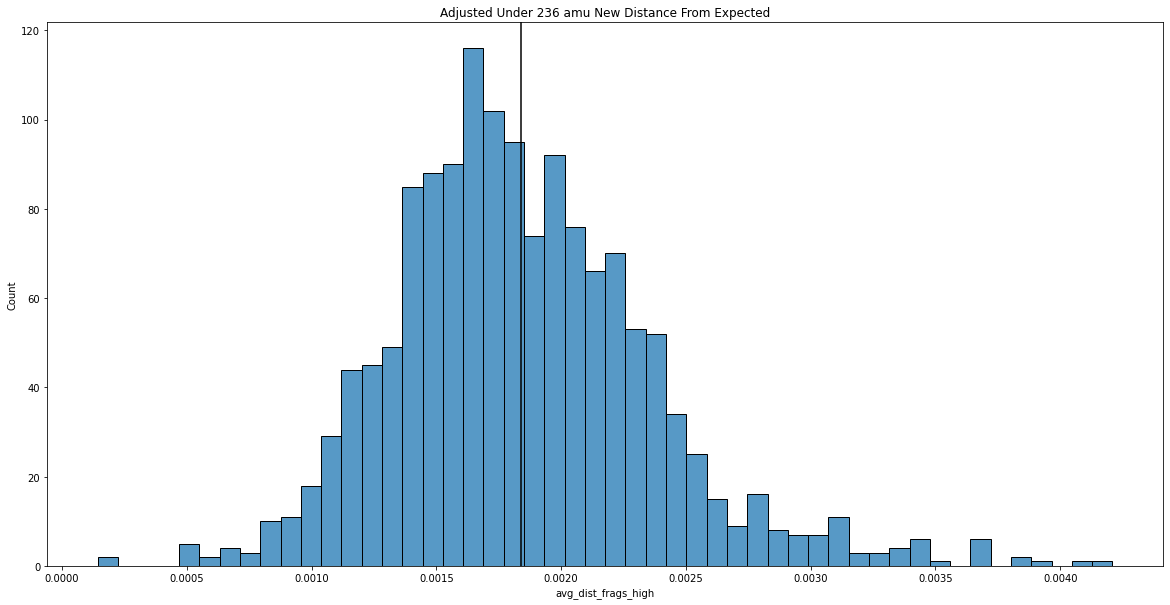

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(x=b['avg_dist_frags_high'], bins=50)
plt.axvline(np.mean(b['avg_dist_frags_high']), 0,70, color='black')
#plt.axvline(np.mean(b[b['calibration']==0]['adjusted_proportion_identified']), 0,70, color='red')
#plt.axvline(np.mean(b[b['calibration']==1]['adjusted_proportion_identified']), 0,70, color='blue')
plt.title('Adjusted Under 236 amu New Distance From Expected')
plt.show()

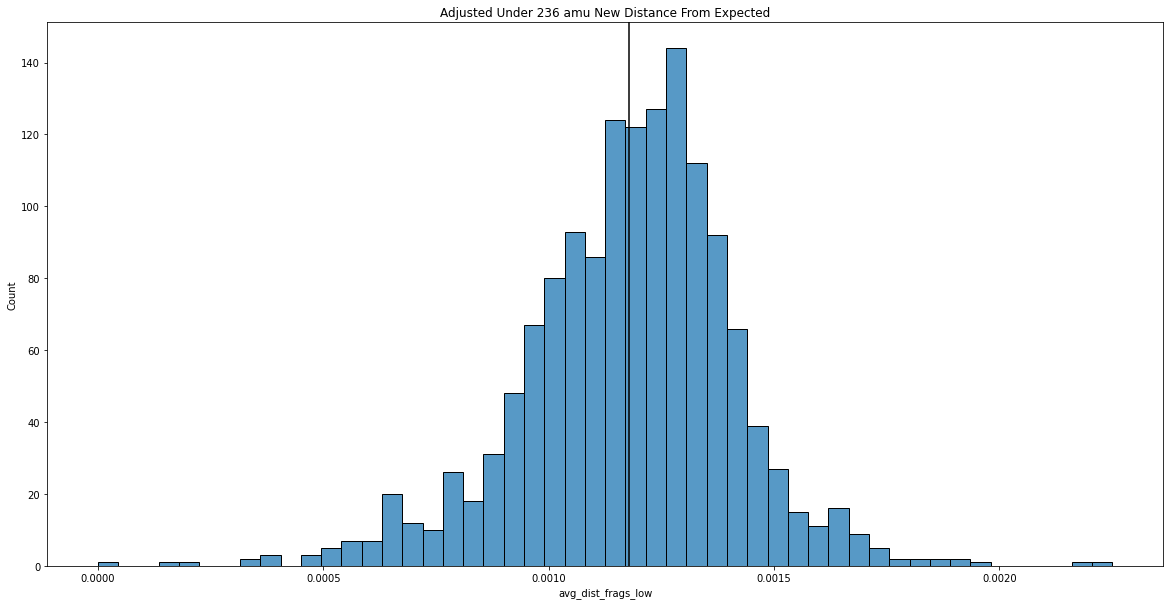

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(x=b['avg_dist_frags_low'], bins=50)
plt.axvline(np.mean(b['avg_dist_frags_low']), 0,70, color='black')
#plt.axvline(np.mean(b[b['calibration']==0]['adjusted_proportion_identified']), 0,70, color='red')
#plt.axvline(np.mean(b[b['calibration']==1]['adjusted_proportion_identified']), 0,70, color='blue')
plt.title('Adjusted Under 236 amu New Distance From Expected')
plt.show()